In [ ]:
from google.colab import drive
drive.mount('/content/drive')






Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Google solution challenge/Train',
    target_size=(224, 224),  # ResNet50 input size
    batch_size=20,
    class_mode='binary'
)

test_dataset = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Google solution challenge/Test',
    target_size=(224, 224),  # ResNet50 input size
    batch_size=20,
    class_mode='binary'
)

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base model with custom layers
oil_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
oil_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = oil_model.fit(train_dataset, steps_per_epoch=9, epochs=20, validation_data=test_dataset)


Found 522 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/20
9/9 [==============================] - 39s 3s/step - loss: 1.0983 - accuracy: 0.6173
Epoch 2/20
9/9 [==============================] - 37s 4s/step - loss: 0.6176 - accuracy: 0.6167
Epoch 3/20
9/9 [==============================] - 34s 4s/step - loss: 0.6355 - accuracy: 0.7111
Epoch 4/20
9/9 [==============================] - 31s 3s/step - loss: 0.6221 - accuracy: 0.6975
Epoch 5/20
9/9 [==============================] - 31s 3s/step - loss: 0.5828 - accuracy: 0.6914
Epoch 6/20
9/9 [==============================] - 35s 4s/step - loss: 0.5822 - accuracy: 0.6833
Epoch 7/20
9/9 [==============================] - 34s 4s/step - loss: 0.5518 - accuracy: 0.7278
Epoch 8/20
9/9 [==============================] - 32s 3s/step - loss: 0.6558 - accuracy: 0.6173
Epoch 9/20
9/9 [==============================] - 33s 4s/step - loss: 0.6016 - accuracy

In [ ]:
# Save the model
oil_model.save('/content/drive/MyDrive/Google solution challenge/models/oil_spill_resnet.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



 ---------------------Image No. 1 --------------------
1/1 [==============================] - 1s 774ms/step


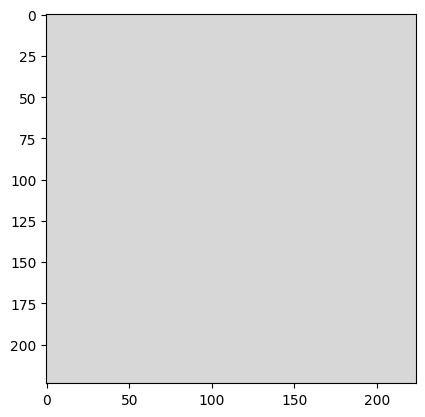

[[0.69667876]]
Clear water

 ---------------------Image No. 2 --------------------
1/1 [==============================] - 0s 123ms/step


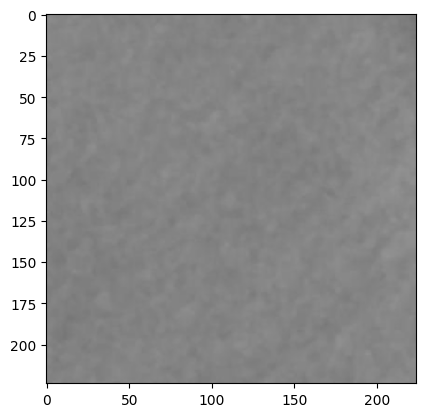

[[0.98469555]]
 Oil spill Present

 ---------------------Image No. 3 --------------------
1/1 [==============================] - 0s 130ms/step


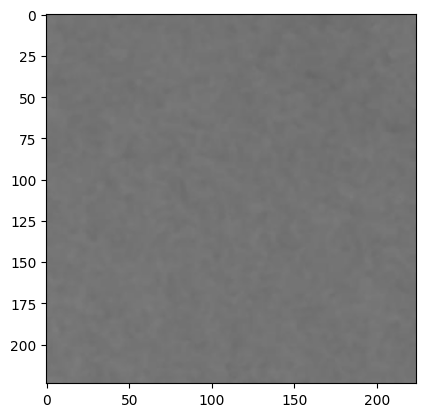

[[0.989448]]
 Oil spill Present

 ---------------------Image No. 4 --------------------
1/1 [==============================] - 0s 126ms/step


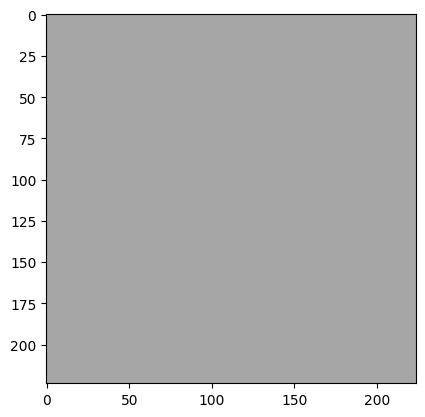

[[0.70008683]]
Clear water

 ---------------------Image No. 5 --------------------
1/1 [==============================] - 0s 127ms/step


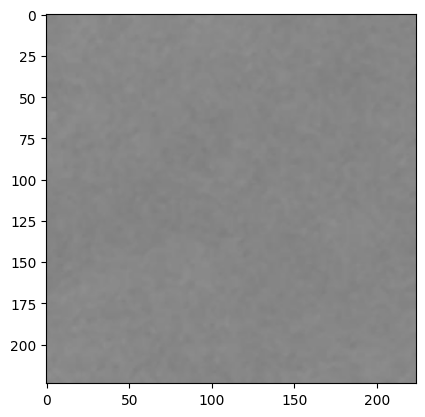

[[0.97101676]]
 Oil spill Present

 ---------------------Image No. 6 --------------------
1/1 [==============================] - 0s 131ms/step


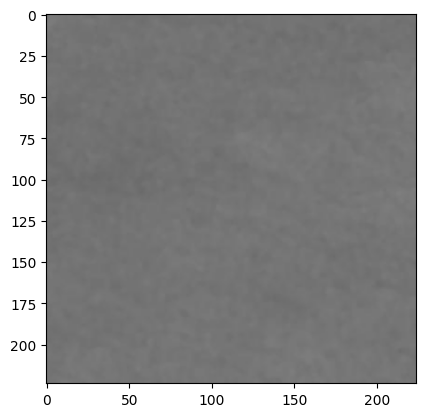

[[0.99422264]]
 Oil spill Present

 ---------------------Image No. 7 --------------------
1/1 [==============================] - 0s 127ms/step


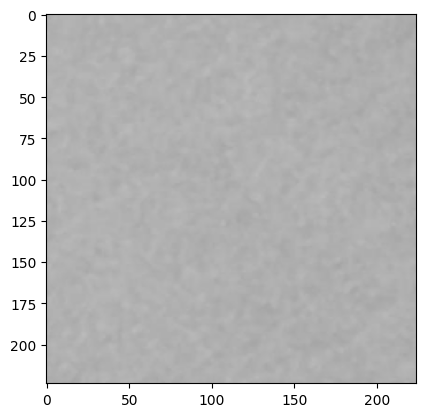

[[0.8368787]]
 Oil spill Present

 ---------------------Image No. 8 --------------------
1/1 [==============================] - 0s 178ms/step


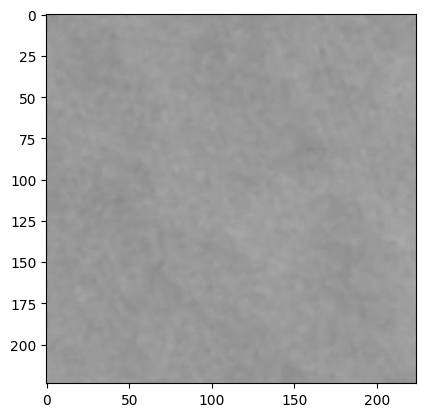

[[0.92939335]]
 Oil spill Present

 ---------------------Image No. 9 --------------------
1/1 [==============================] - 0s 187ms/step


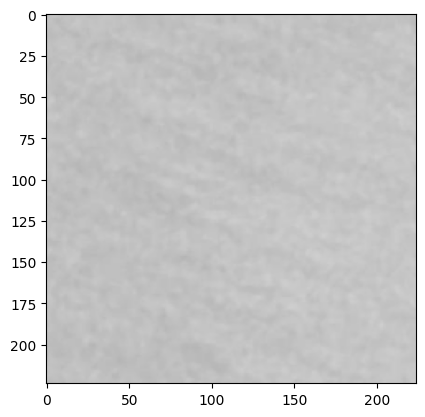

[[0.78698605]]
Clear water
[['0_0_0_img_8YWuJFw4wUT6HnRg_JAV_cls_0.jpg', 'Clear water'], ['7_600_200_img_N4eE49g4YsXf_VEN_cls_0.jpg', ' Oil spill Present'], ['2_400_0_img_0t9JBHeOeBHgaLmJ_JAV_cls_0.jpg', ' Oil spill Present'], ['1_200_0_img_SCoVQ72iCMzSlCo5_CHS_cls_0.jpg', 'Clear water'], ['1_200_0_img_QoXUs6o5JoBCqgXs_GBR_cls_0.jpg', ' Oil spill Present'], ['1_200_0_img_Pvbv4YQGT4WlJ6Jq_GBR_cls_0.jpg', ' Oil spill Present'], ['1_200_0_img_1bGgfzBJbJhHp_VEN_cls_0.jpg', ' Oil spill Present'], ['1_200_0_img_0YfShanad3Ym3OPA_GBR_cls_0.jpg', ' Oil spill Present'], ['0_0_0_img_ZeZn8duw6a2zyTJu_GBR_cls_0.jpg', 'Clear water']]


In [ ]:
from tensorflow.keras.models import load_model
import os
import tensorflow as tf
import matplotlib.pyplot as plt

loaded_model = load_model('/content/drive/MyDrive/Google solution challenge/models/oil_spill_resnet.h5')

dir_path = '/content/drive/MyDrive/Google solution challenge/temp clear water'

results = []

# List only the first 10 images
for i, image_name in enumerate(os.listdir(dir_path)[:31]):
    print("\n ---------------------Image No.", i+1, "--------------------")
    img_path = os.path.join(dir_path, image_name)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    prediction = loaded_model.predict(img_array)

    plt.imshow(img)
    plt.show()
    print(prediction)


    if prediction < 0.8:

        result = "Clear water"
    else:

        result = " Oil spill Present"
    print(result)

    results.append([image_name, result])

print(results)


In [ ]:
from google.colab import files
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

# Load the pre-trained model
loaded_model = load_model('/content/drive/MyDrive/Google solution challenge/models/oil_spill_resnet.h5')

# Upload your image
uploaded = files.upload()

# Process uploaded image
for image_name, image_data in uploaded.items():
    print("\n--------------------- Image ---------------------")
    img = Image.open(io.BytesIO(image_data))
    img = img.resize((200, 200))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    plt.imshow(img)
    plt.show()
    prediction = loaded_model.predict(img_array)
    print(prediction)

    if prediction < 0.8:
        result = "Clear water"
    else:
        result = "Oil spill Present"
    print("Prediction:", result)
